In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio ICD - 2024 Práctica 1. 

## Costumer Purchasing behaviors

In [10]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")

Importar dataset en un dataframe llamado "Costumer Purchasing Behaviors" con 238 líneas de contenido y 7 columnas.

In [13]:
print(df)

     user_id  age  annual_income  purchase_amount  loyalty_score region  \
0          1   25          45000              200            4.5  North   
1          2   34          55000              350            7.0  South   
2          3   45          65000              500            8.0   West   
3          4   22          30000              150            3.0   East   
4          5   29          47000              220            4.8  North   
..       ...  ...            ...              ...            ...    ...   
233      234   40          60000              450            7.2   West   
234      235   38          59000              430            6.9  North   
235      236   54          74000              630            9.4  South   
236      237   32          52000              360            5.8   West   
237      238   31          51000              340            5.6  North   

     purchase_frequency  
0                    12  
1                    18  
2                    

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'purchase_amount'}>],
       [<Axes: title={'center': 'loyalty_score'}>,
        <Axes: title={'center': 'purchase_frequency'}>]], dtype=object)

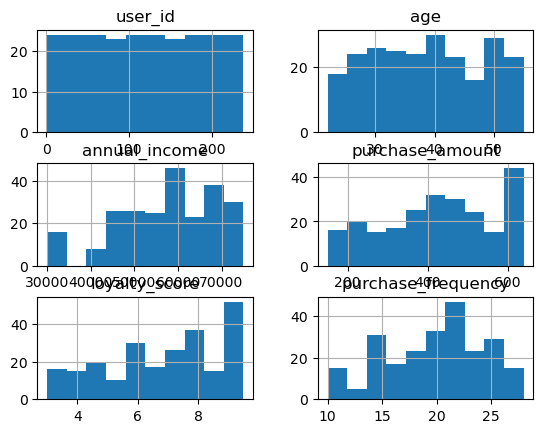

In [17]:
df.hist()

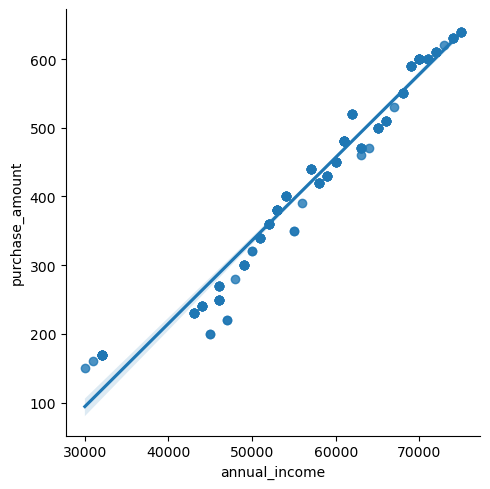

In [19]:
sns.lmplot(x="annual_income", y="purchase_amount", data=df)

Parece ser que mientras más es el ingreso anual, mayor es el monto de compra.

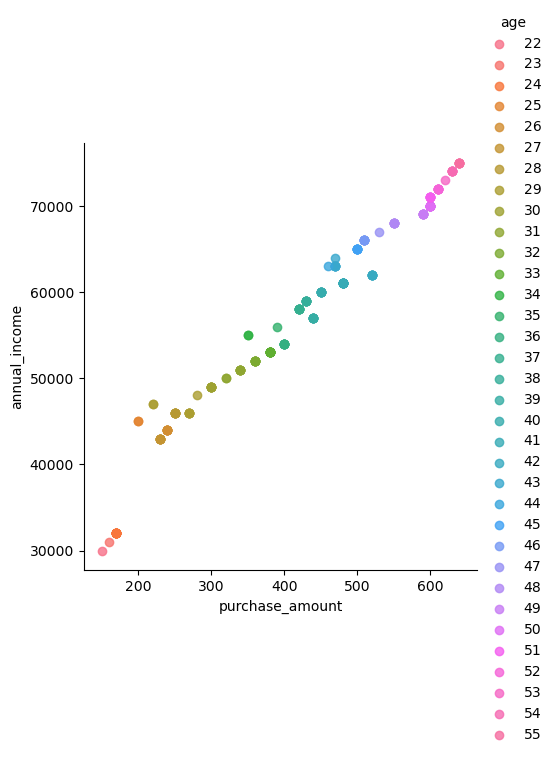

In [73]:
sns.lmplot(x="purchase_amount", y="annual_income", data=df,
           fit_reg=False, # No línea de regresión
           hue="age") # Color para 

Las personas adultas con mayores ingresos anuales parecen tener el mayor monto de compra.

<Axes: >

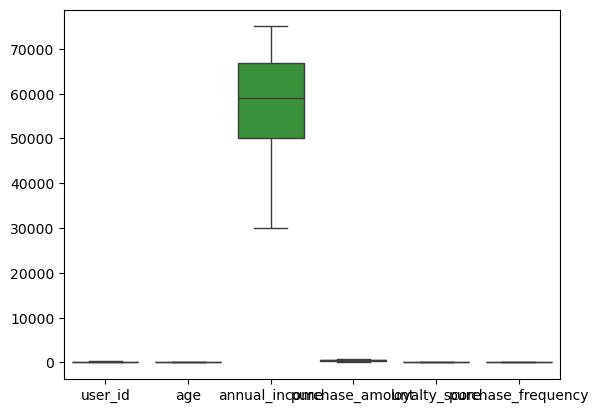

In [29]:
sns.boxplot(data=df)

<Axes: >

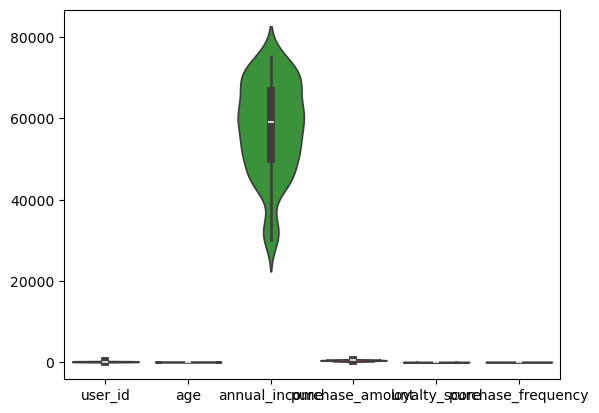

In [31]:
sns.violinplot(data=df)

<Axes: xlabel='region', ylabel='purchase_amount'>

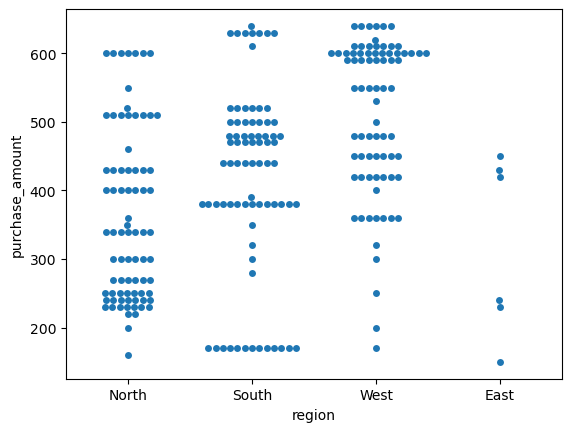

In [53]:
sns.swarmplot(y="purchase_amount", x="region", data=df)

<Axes: xlabel='age', ylabel='loyalty_score'>

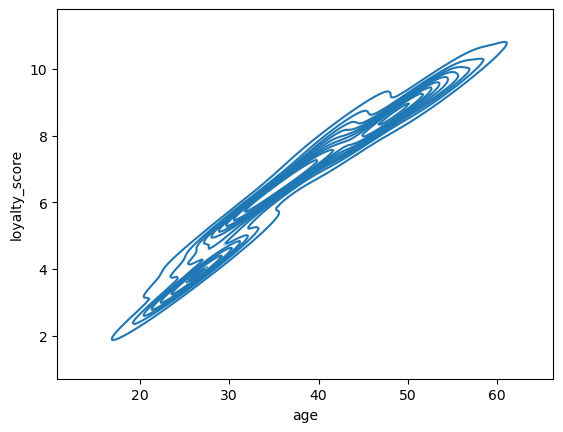

In [61]:
sns.kdeplot(x="age", y="loyalty_score", data=df)

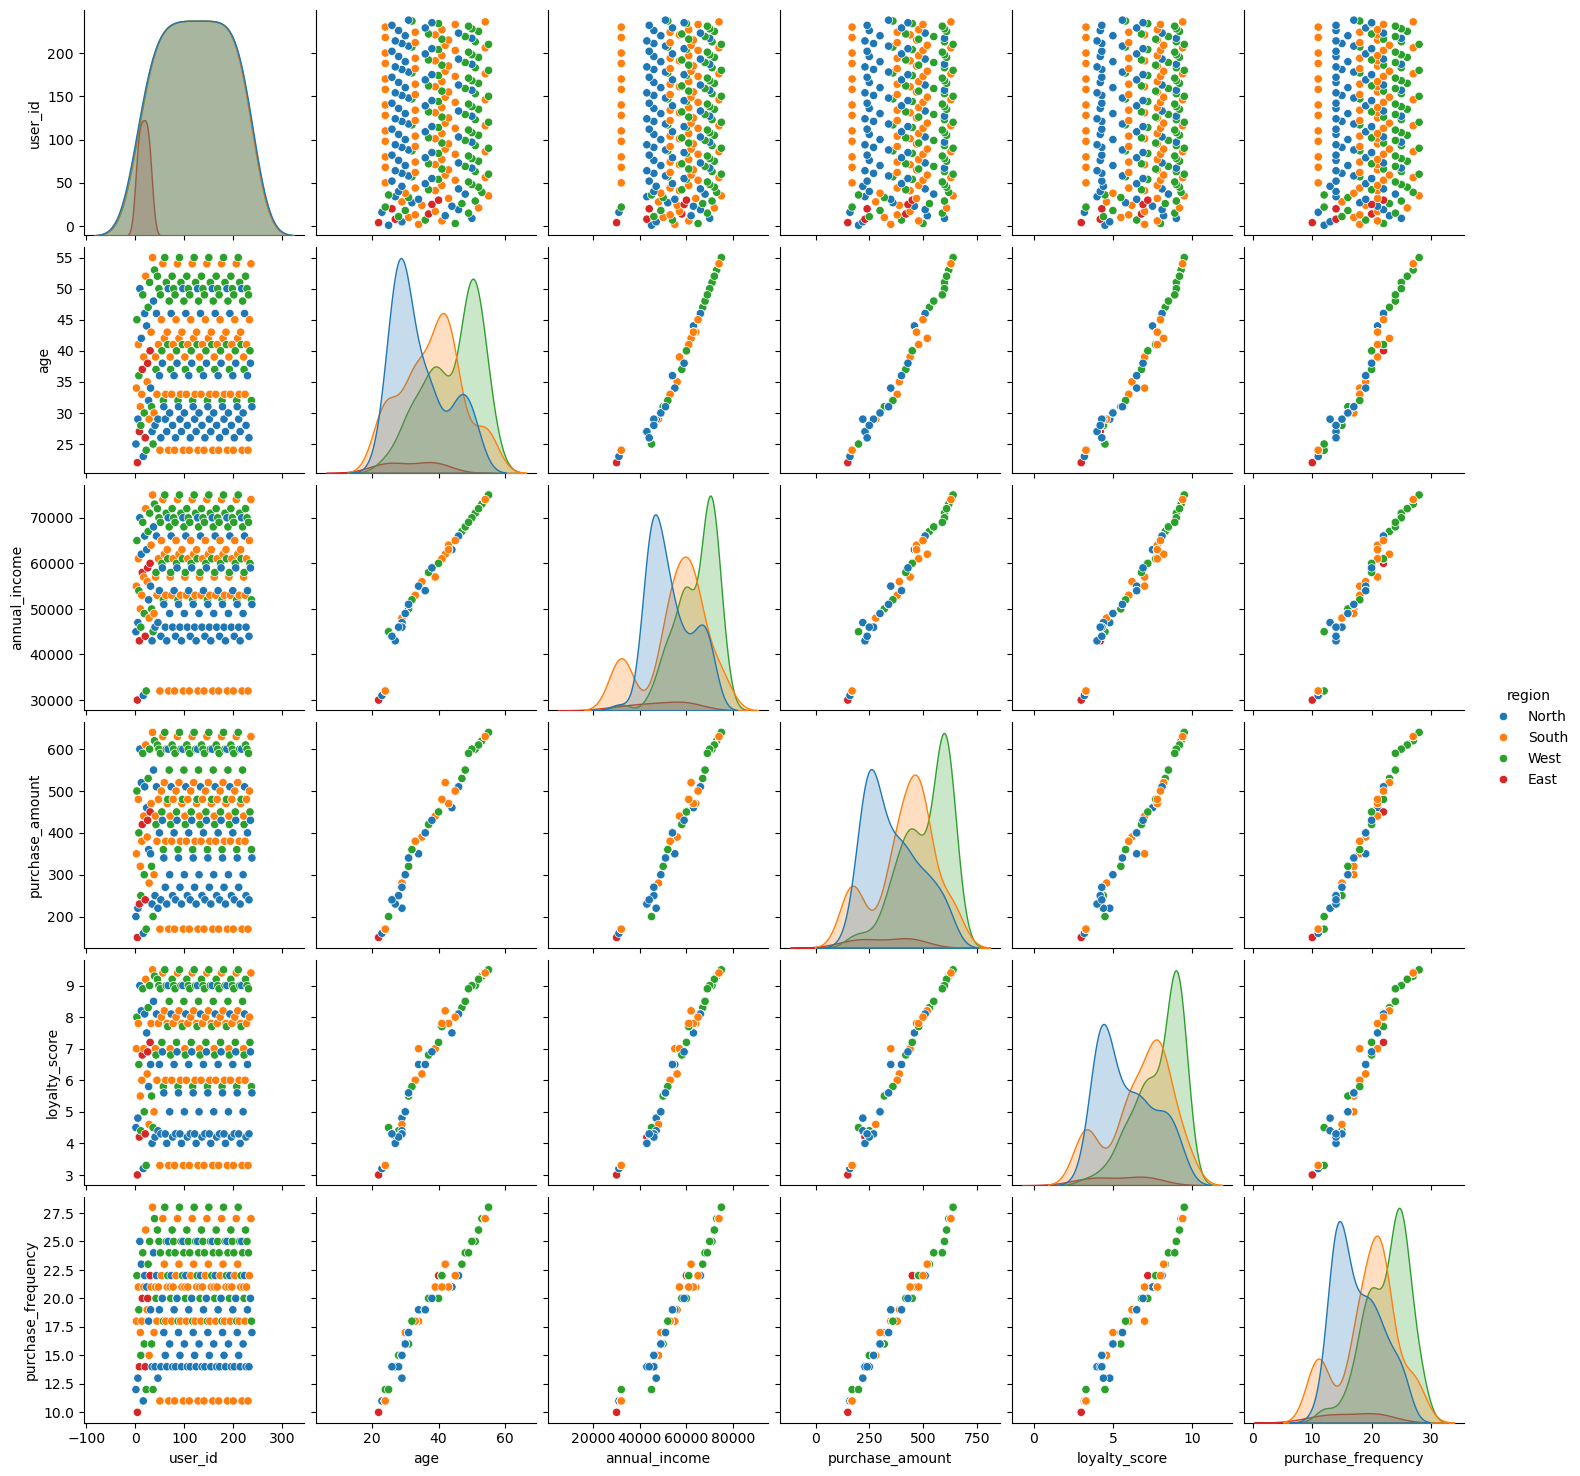

In [63]:
sns.pairplot(df, hue="region")
plt.show()

# MatplotLib library

## 1D - Bar chart (x, height)

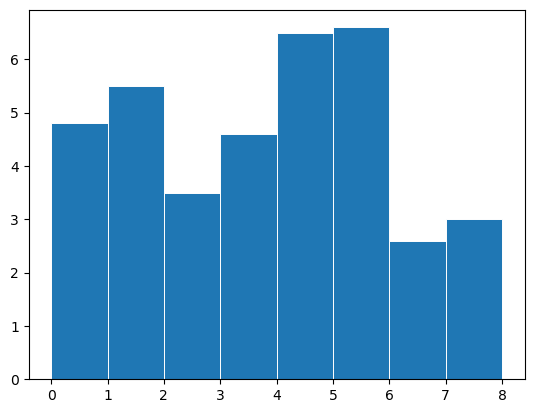

In [66]:
# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.show()

## 1D - pie(x)

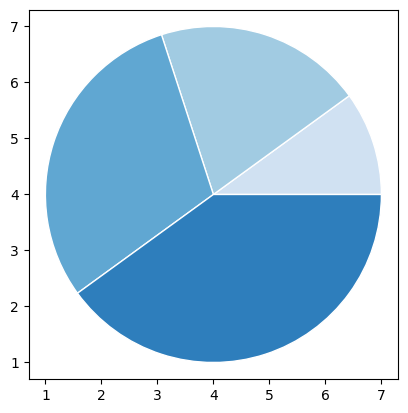

In [69]:
# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

plt.show()

## 2D - plot(x,y)

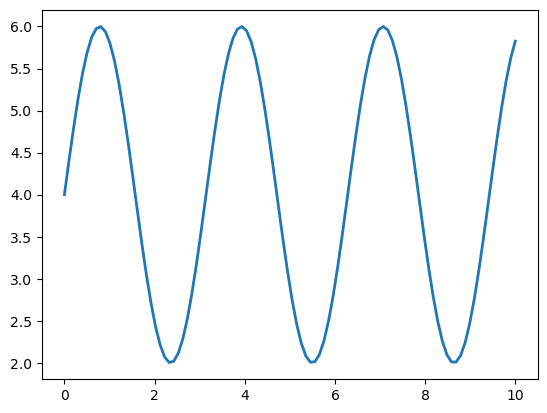

In [76]:
# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.show()

## 3D - Scater plot

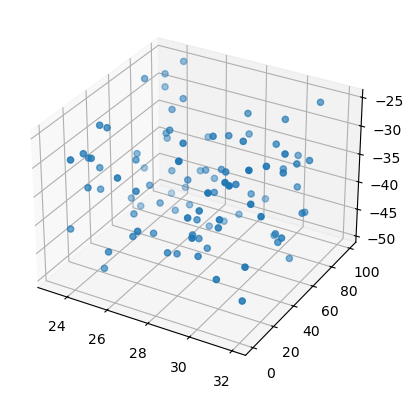

In [79]:
# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)
plt.show()

# Seaborn library

## 1D - Line plot

<Axes: >

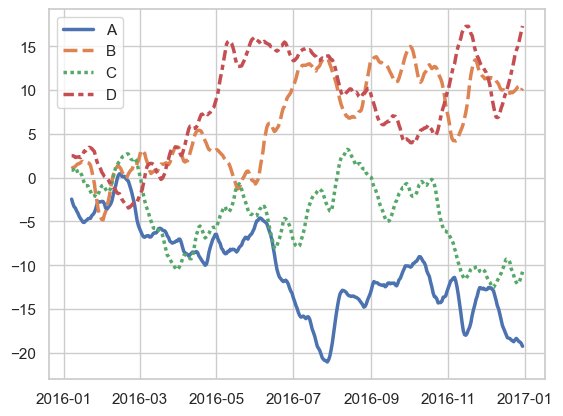

In [81]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, linewidth=2.5)

## 2D - Violin plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_17124\1409606945.py:22: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)


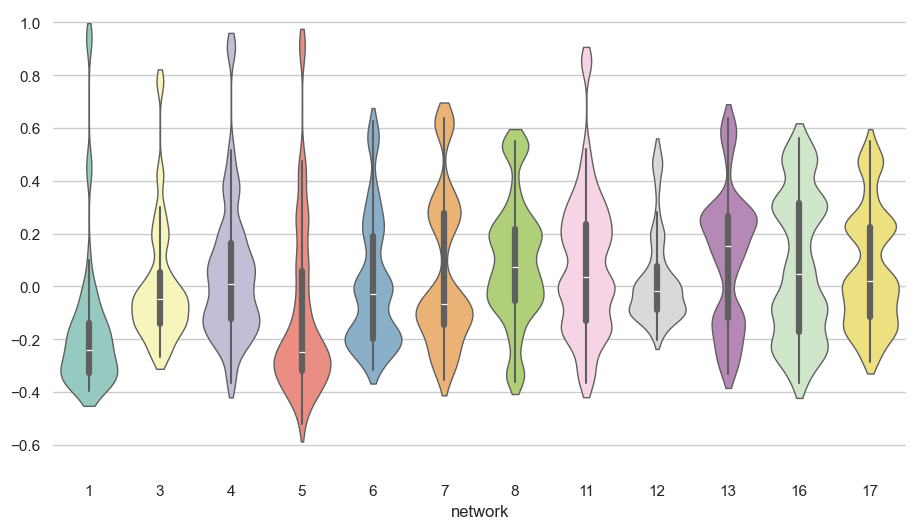

In [86]:
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

# 2D - Grouped boxplots

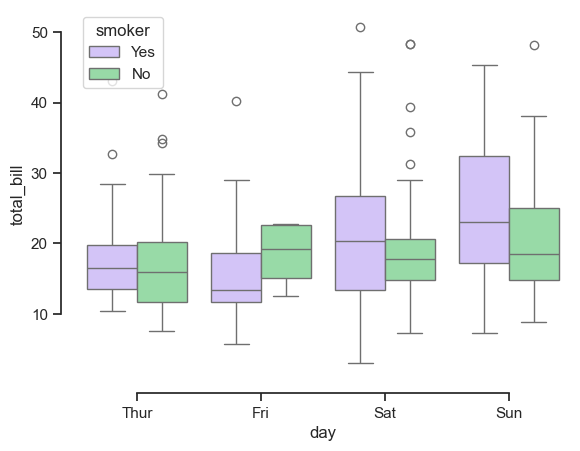

In [89]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

## Multiple Linear Regression

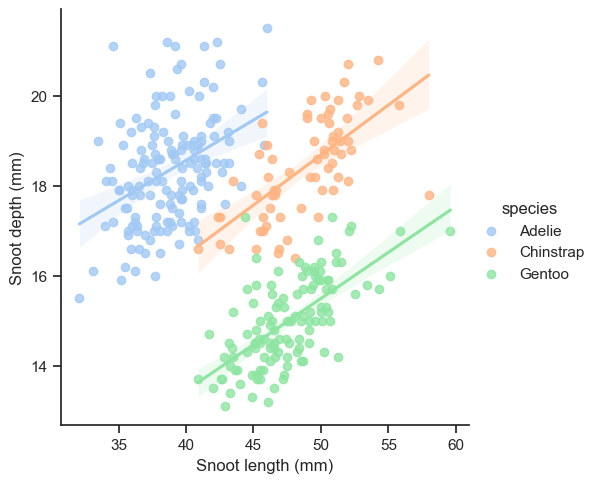

In [92]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [94]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

# Fue muy divertida la Práctica, muchas gracias por la oportunidad.

## Me entretuve bastante buscando distintos tipos de dataframes en Keggle, ahora quiero analizar varios jaja